## <center> Prova [01] - Inteligência Artificial / UFPB - 2021.2 </center>
**Discente:** Lucas Gomes Dantas <br>
**Matrícula:** 20200082925 <br>
**Dataset:** <a href="https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min">League of Legends - Diamond Ranked Games 10 min</a>


***


**1 - (1 pt.)** Para cada um dos agentes a seguir, desenvolva uma descrição completando a tabela abaixo sobre o ambiente de tarefas de cada um. <br>

> [A] Agente comentarista de jogo - League of Legends. <br> <br>
> [A] Agente sugestor de vinho. <br> <br>
> [C] Agente treinador de time - Basquete.


|Agente| Medida de Desempenho | Ambiente | Atuadores | Sensores |
| :- | :- | :- | :- | :- |
| [A] | Ações geradas pelos jogadores com seus respectivos champs (campeões, personagens), pontuação correta, minimizar tempo de geração de relatório (comentário).  | Engine/platarforma que suporta o game, mapa, campeões (personagens). | Exibir dados de desempenho, diagnóstico de comportamento durante e pós partida,  indicação de bons comportamentos ao finalizar a sessão. | Entrada de dados pela própria engine (tempo de execução de uma habilidade, tempo de recarga de habilidade), percepção de pixels e entrada de ações geradas pelo teclado dos jogadores durante a sessão. |
| [B] | Atende as características que o consumidor assume como um bom vinho. | Bares, adegas, restaurantes, pessoas. | Apresenta as categorias dos vinhos, seus tipos, aromas, precificação e datação. | Entrada através do teclado, tela (terminal visual), descobertas e respostas de apreciadores de vinho (dados e especificações características). |
| [C] | Incrementa o desempenho dos jogadores em partidas, gera profusão nos resultados das partidas. | Time de basquete, ambiente de treinamento, jogadores. | Apresentar dados físicos individuais por jogador, aferir velocidade, altura do salto, sugestões de treinamento individual e em time, correções de comportamento durante os tempos. | Sensor visual (câmera); sensor de batimento cardíaco, oxigênio e água; entrada pelo teclado para informações físicas, respostas dos jogadores. |

**2 - (2 pts.)** Diferencie os 4 tipos de aprendizado de máquina. Para tanto, escolha uma base de dados do Kaggle e explique como aplicar os 4 métodos nessa mesma base. 

|Aprendizado de Máquina||
| :- | :- |
| Supervisionado | #### |
| Não-supervisonado | #### |
| Semi-supervisionado | #### |
| Reforço | #### |


**3 - (5 pts.)** Em um Jupyter Notebook (link do collab, GitHub ou arquivo), utilize o método K vizinhos mais próximos na base escolhida na questão anterior para um contexto SUPERVISIONADO e para classificação:

> **[*] Ambiente e Dependências**

In [23]:
from statistics import mode

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, confusion_matrix, r2_score, mean_squared_error, mean_absolute_error)

> **[#] Dataset**

In [3]:
wins = pd.read_csv('high_diamond_ranked_10min.csv')
wins.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


> **[#] Pré-processamento**

In [4]:
wins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

>> É aferida a incidência de apenas valores quantitativos. Cenário ideal para a aplicação na matriz de correlação, PCA e KNN.

In [5]:
wins.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [6]:
## wins.hist(figsize=(20, 20))
## plt.show()

>> Utilizarei o dataset para prevê as chances de vitória de cada time, vermelho e azul. Com isso, irei retirar a classe blueWins para que não ocorra influência. 

In [7]:
wins_copy = wins.copy()
wins_copy = wins_copy.drop(["blueWins", "gameId"], axis = 1)

In [8]:
wins_copy.describe()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


<AxesSubplot:>

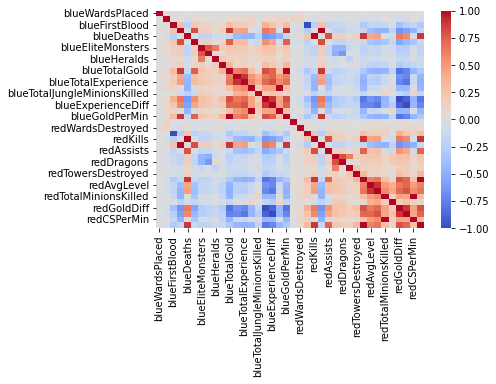

In [26]:
sns.heatmap(wins_copy.corr(), cmap = 'coolwarm')

> **[#] Funções auxiliares**

***

> **[3.1]** Aplique processos de pré-processamento e os necessários para execução do método K-NN. 

In [10]:
#Pré-Processamento e Definição de Atributo 

x = wins_copy.drop(columns = "blueFirstBlood")
y = wins_copy.loc[:, "blueFirstBlood"]

x = RobustScaler().fit_transform(x)

>>> Separando dados de treinamento e teste - 80% para treinamento e 20% para validação.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 1)

>>> Aplicação do KNN para 5 valores - K: 1, 3, 5, 7, 9

In [12]:
k_list = [1,3,5,7,9]

knn_list = []

for k in k_list:
    knn_list.append(KNeighborsClassifier(n_neighbors = k))

for knn in knn_list:
    knn.fit(x_train, y_train)

In [13]:
result_list = []

for knn in knn_list:
    result_list.append(knn.predict(x_test))

In [27]:
result_list

[array([1, 0, 1, ..., 0, 0, 0]),
 array([1, 0, 1, ..., 0, 0, 0]),
 array([1, 0, 1, ..., 1, 0, 0]),
 array([1, 0, 1, ..., 1, 0, 0]),
 array([1, 0, 1, ..., 0, 0, 0])]

> **[3.2]** Aplique correlação ou PCA e selecione um número menor de atributos com esses métodos e justifique sua decisão. 

> **[3.3]** Escolha 5 valores de K e mostre os resultados (escolha 3 métricas de avaliação e mostre a matriz de confusão) e explique os resultados encontrados. 

> **[3.4]** Escolha 2 métricas de similaridade (diferentes distâncias ou outras métricas - correlação, por exemplo) para definir o(s) vizinho(s) mais próximos e explique os resultados encontrados. 

> **[3.5]** Melhor K e melhor distância e testar com o conjunto de atributos do item 2.

**4 - (2 pts)** Considerando a matriz de confusão abaixo, quais são os valores das métricas listadas abaixo?

|| CLASSE VERDADEIRA | C. V. | C. V. | C. V. | C. V. |  |
| :- | :- | :- | :- | :- | :- | :- |
| | *CLASSES* | Maçã | Laranja | Limão | Manga | *Total* |
| | | | | | | |
| **CLASSE PREDITA** | Maçã | 70 | 20 | 5 | 5 | 100 | 
| **C. P.** | Laranja | 10 | 67 | 3 | 20 | 100
| **C. P.** | Limão | 5 | 30 | 55 | 10 | 100 |
| **C. P.** | Manga | 5 | 4 | 2 | 1.000 | 1.011 |
| |
| | *Total* | 90 | 121 | 65 | 1.035 | 2.622 |

> **[*] Ambiente e Dependências**

In [14]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from scipy.integrate import simps, trapz

> **[#] Funções auxiliares**

In [15]:
def sensibilidade(fruta: dict[str, int]): ## Sensibilidade - VP / (VP + FN)
  return fruta["vp"] / (fruta["vp"] + fruta["fn"])

def especificidade(fruta: dict[str, int]): ## Especificidade - VN / (VN + FP)
  return fruta["vn"] / (fruta["vn"] + fruta["fp"])

def precisao(fruta: dict[str, int]): ## Precisão - VP / (VP + FP)
  return fruta["vp"] / (fruta["vp"] + fruta["fp"])

def f1(precisao, sensibilidade): ## F1 = (2 * Precisão * Sensibilidade) / (Precisão + Sensibilidade)
  return (2 * precisao * sensibilidade) / (precisao + sensibilidade)

def acuracia(fruta: dict[str, int]): ## Acurácia = (VN + VP) / (VP + FN + VN + FP)
  return (fruta["vn"] + fruta["vp"]) / (fruta["vp"] + fruta["fn"] + fruta["vn"] + fruta["fp"])   

def phi(fruta: dict[str, int]):  ## Coeficiente de Correlação de Matthews (phi) = (VP * VN – FP * FN) / sqrt((VP + FP) * (VP + FN) * (VN + FP) * (VN + FN))
  return (((fruta["vp"] * fruta["vn"]) - (fruta["fp"] + fruta["fn"])) / math.sqrt((fruta["vp"] + fruta["fp"]) * (fruta["vp"] + fruta["fn"]) * (fruta["vn"] + fruta["fp"]) * (fruta["vn"] + fruta["fn"])))

def tpr(fruta: dict[str, int]): ## True Positive Rate - Taxa de Verdadeiro Positivo = (VP / (VP + FN))
  return fruta["vp"] / (fruta["vp"] + fruta["fn"])

def fpr(fruta: dict[str, int]): ## False Positive Rate - Taxa de Falso Positivo = (FP / (VN + FP))
  return fruta["fp"] / (fruta["vn"] + fruta["fp"])

> **[#] Convertendo Planilha** 

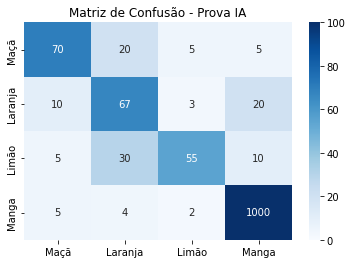

In [16]:
conf_arr = np.array([[70, 20, 5, 5], [10, 67, 3, 20], [5, 30, 55, 10], [5, 4, 2, 1000]])

df_cm = pd.DataFrame(conf_arr, index = ['Maçã', 'Laranja', 'Limão', 'Manga'], columns = ['Maçã', 'Laranja', 'Limão', 'Manga'])

res = sn.heatmap(df_cm, annot = True, vmin = 0.0, vmax = 100.0, cmap = plt.cm.Blues, fmt = 'g')

plt.yticks([0.5, 1.5, 2.5, 3.5], ['Maçã', 'Laranja', 'Limão', 'Manga'], va = 'center')
plt.title('Matriz de Confusão - Prova IA')
plt.show()

> **[#] Dados** 

In [17]:
# Frutas
maca = {"vp":70, "fp":(20 + 5 + 5), "fn":(10 + 5 + 5), "vn":(67 + 55 + 1000)}
laranja = {"vp":67, "fp":(10 + 3 + 20), "fn":(20 + 30 + 4), "vn":(70 + 55 + 1000)}
limao = {"vp":55, "fp":(5 + 30 + 10), "fn":(5 + 3 + 2), "vn":(70 + 67 + 1000)}
manga = {"vp":1000, "fp":(5 + 4 + 2), "fn":(5 + 20 + 10 ), "vn":(70 + 67 + 55)}

In [18]:
# Métricas
sensibilidade = (sensibilidade(maca) + sensibilidade(laranja) + sensibilidade(limao) + sensibilidade(manga)) / 4
especificidade = (especificidade(maca) + especificidade(laranja) + especificidade(limao) + especificidade(manga)) / 4
precisao = (precisao(maca) + precisao(laranja) + precisao(limao) + precisao(manga)) / 4 
f1 = f1(precisao, sensibilidade)
acuracia = (acuracia(maca) + acuracia(laranja) + acuracia(limao) + acuracia(manga)) / 4 
phi = (phi(maca) + phi(laranja) + phi(limao) + phi(manga)) / 4 

# ROC - AUC
tpr = (tpr(maca) + tpr(laranja) + tpr(limao) + tpr(manga)) / 4 
fpr = (fpr(maca) + fpr(laranja) + fpr(limao) + fpr(manga)) / 4 

> **[#] Métricas - Matriz de Confusão** 

In [19]:
print(f'Sensibilidade = {sensibilidade:.2f}')
print(f'Especificidade = {especificidade:.2f}')
print(f'Precisão = {precisao:.2f}')
print(f'Medida F1 = {f1:.2f}')
print(f'Acurácia = {acuracia:.2f}')
print(f'Coeficiente de Matthews = {phi:.2f}')

Sensibilidade = 0.79
Especificidade = 0.96
Precisão = 0.73
Medida F1 = 0.76
Acurácia = 0.95
Coeficiente de Matthews = 0.71


> **[*] AUC**

In [20]:
print(f'Taxa de verdadeiro positivo = {tpr:.2f}')
print(f'Taxa de falso positivo = {fpr:.2f}')

Taxa de verdadeiro positivo = 0.79
Taxa de falso positivo = 0.04


In [21]:
x = (0, tpr, 1)
y = (0, fpr, 1)

auc = trapz(x, y)

print(f'Area Under The Curve - AUC = {auc:.2f}')

Area Under The Curve - AUC = 0.87


> **[*] Como você resolveria o problema dessa base de dados observando as métricas de avaliação?**

Ao analisar os dados da matriz, é possível aferir que há um desbalanceamento entre as classes limão e manga com, respectivamente, 65 e 1.035 instâncias. À vista disso, é interessante o uso de um nivelador, balanceador de classes, para que haja uma coleta de dados menos tendenciosa. Como há uma quantidade elevada apenas da classe manga, o uso do método **undersampling** seria o mais interessante para o contexto, este que exclui observações da classe para balancear o conjunto de dados.

**5* - (Extra ++)** Elabore uma pergunta e responda sobre "Preconceito e Inteligência Artificial", refletindo aspectos importantes do método que uma pessoa engenheiro de dados/cientista de dados deve conhecer e se preocupar garantindo ética nos modelos criados.

***

In [22]:
#!pip3 install math
#!pip3 install matplotlib
#!pip3 install pandas
#!pip3 install seaborn
#!pip3 install statistics 
#!pip3 install sklearn